In [2]:
from kafkanator import lorentz_curve,gini
import matplotlib.pyplot as pyplt
import numpy as np
from IPython.display import Image

<h2> Lorentz Curve plot </h2>
<br/>
<br/>
Lets apply lorentz_curve function from kafkanator API, in order to visualize how fair confort ressource is being shared in a transatlantic airplane.

As discussed in the white paper, the airplane layout we will compute lorentz curve over is this one :
<center><img src="images/airplane_layout.png" width="30%"></img></center>

In [3]:
W = 6
POP_1 = 10
POP_2 = 15
POP_3 = 30

CONFORT_1 = 3
CONFORT_2 = 2
CONFORT_3 = 1

population = [ POP_3*W , POP_2*W, POP_1*W ]
confort = [ CONFORT_3*POP_3*W , CONFORT_2*POP_2*W, CONFORT_1*POP_1*W ]

(lorentz_x_coordinates, lorentz_y_coordinates) = lorentz_curve ( population , confort )

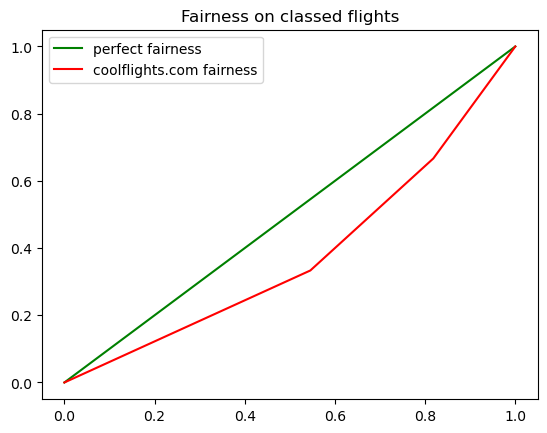

In [4]:
pyplt.plot([0,0.5,1],[0,0.5,1],color='g',label='perfect fairness')
pyplt.plot(lorentz_x_coordinates,lorentz_y_coordinates,color='r', label='coolflights.com fairness')
pyplt.legend()
pyplt.title('Fairness on classed flights')
pyplt.show()

Now lets say that coolflights.com in an attempt to win more money, chooses to shrink space in the last class, and 
it builds bigger airplanes, putting more people in the last class. 

We will have the next parameters :

In [5]:
W = 6
POP_1 = 10
POP_2 = 15
POP_3 = 60

CONFORT_1 = 3
CONFORT_2 = 2
CONFORT_3 = 0.5

In [6]:
population = [ POP_3*W , POP_2*W, POP_1*W ]
confort = [ CONFORT_3*POP_3*W , CONFORT_2*POP_2*W, CONFORT_1*POP_1*W ]

(lorentz_coordinates_x_pop, lorentz_coordinates_y_confort) = lorentz_curve ( population , confort )

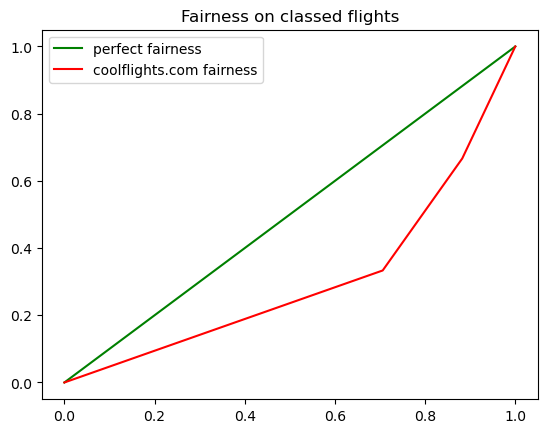

In [7]:
pyplt.plot([0,0.5,1],[0,0.5,1],color='g',label='perfect fairness')
pyplt.plot(lorentz_coordinates_x_pop,lorentz_coordinates_y_confort,color='r', label='coolflights.com fairness')
pyplt.legend()
pyplt.title('Fairness on classed flights')
pyplt.show()

We can see here how from almost half of population sharing 0.4 of the ressources we pass to 0.7 of population having 
less than 0.4 of the ressources, what is very unfair.

In [8]:
W = 6
POP_1 = 10
POP_2 = 15
POP_3 = 30

CONFORT_1 = 3
CONFORT_2 = 2
CONFORT_3 = 1

population = [ POP_3*W , POP_2*W, 0 ]
confort = [ CONFORT_3*POP_3*W , CONFORT_2*POP_2*W, CONFORT_1*POP_1*W ]

<h2> Gini Coefficient Computing : </h2>

<h3> First Case: </h3>

In [9]:
conf1 = np.concatenate( ( np.repeat(CONFORT_3,W*POP_3) , np.repeat(CONFORT_2,W*POP_2) , np.repeat(CONFORT_1,W*POP_1)) , axis=None)

In [10]:
conf1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [11]:
g = gini(conf1)

In [12]:
print(g)

0.24242424242424243


<h3> Second Case: </h3>

To see how gini go close to 1, when the confort assignation is more unfair, lets augment class 3 population to 360 people, and lets give them 0.5 conforts points.

In [13]:
conf1 = np.concatenate( ( np.repeat(0.5,360) , np.repeat(2,90) , np.repeat(3,60)) , axis=None)
g = gini(conf1)
print(g)

0.39215686274509803
